In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\ANUSHA\Documents\NIIT_PY_In_DS_C4\Project_Data_Files\DS1_C4_S9_Car_Data.xlsx")
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


Safety Feature Assessment:
Tata Nano Genx has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Tata Nano Genx has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Tata Nano Genx has: No ABS, No Airbags, Hill_Assist | Safety Score: 1.0/3
Tata Nano Genx has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Tata Nano Genx has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Tata Nano Genx has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Datsun Redi-Go has: ABS_(Anti-lock_Braking_System), No Airbags, No Hill Assist | Safety Score: 1.0/3
Datsun Redi-Go has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Datsun Redi-Go has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Datsun Redi-Go has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Datsun Redi-Go has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Datsun Redi-Go has: No ABS, No Airbags, No Hill Assist | Safety Score: 0.0/3
Renault Kwid has: ABS_(Anti-

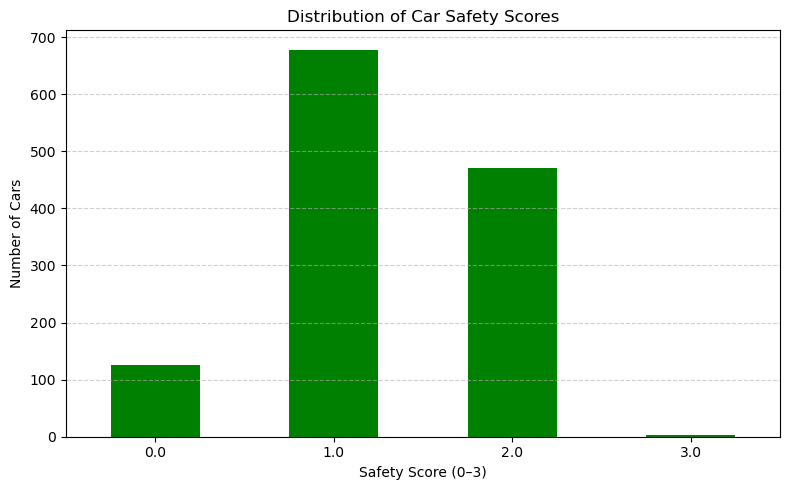

In [3]:
# Task_1

# Map 'Yes' to 1 and 'No' to 0, and fill NaNs with 0
df['ABS_(Anti-lock_Braking_System)'] = df['ABS_(Anti-lock_Braking_System)'].map({'Yes': 1, 'No': 0}).fillna(0)
df['Airbags'] = df['Airbags'].map({'Yes': 1, 'No': 0}).fillna(0)
df['Hill_Assist'] = df['Hill_Assist'].map({'Yes': 1, 'No': 0}).fillna(0)

# Create a new column for safety score
df['Safety_Score'] = df['ABS_(Anti-lock_Braking_System)'] + df['Airbags'] + df['Hill_Assist']

# Function to print safety features (optional, keep if needed)
def assess_safety(row):
    abs_present = "ABS_(Anti-lock_Braking_System)" if row['ABS_(Anti-lock_Braking_System)'] == 1 else "No ABS"
    airbags_present = "Airbags" if row['Airbags'] == 1 else "No Airbags"
    hill_assist_present = "Hill_Assist" if row['Hill_Assist'] == 1 else "No Hill Assist"
    
    safety_score = row['Safety_Score']
    
    print(f"{row['Make']} {row['Model']} has: {abs_present}, {airbags_present}, {hill_assist_present} | Safety Score: {safety_score}/3")

# Apply the function (optional)
print("Safety Feature Assessment:")
df.apply(assess_safety, axis=1)

# Plotting the distribution of safety scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['Safety_Score'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Distribution of Car Safety Scores')
plt.xlabel('Safety Score (0–3)')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Average Seating Capacity: 5.27
Number of models with Central Locking: 1127
Number of models with Child Safety Locks: 1201

Car Models and Their Features:
            Make      Model  Seating_Capacity Central_Locking  \
0           Tata  Nano Genx               4.0             Yes   
1           Tata  Nano Genx               4.0              No   
2           Tata  Nano Genx               4.0              No   
3           Tata  Nano Genx               4.0             Yes   
4           Tata  Nano Genx               4.0              No   
...          ...        ...               ...             ...   
1271       Honda       City               5.0             Yes   
1272       Honda       City               5.0             Yes   
1273       Honda       City               5.0             Yes   
1274       Honda       City               5.0             Yes   
1275  Mitsubishi    Montero               7.0             Yes   

     Child_Safety_Locks  
0                   Yes  
1            

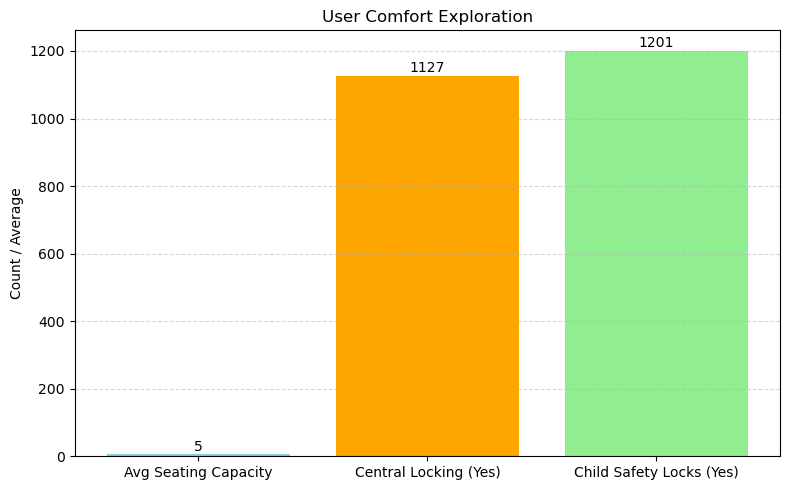

In [8]:
# Task_2

import matplotlib.pyplot as plt

# Task 1: Calculate average seating capacity
average_seating_capacity = df['Seating_Capacity'].mean(skipna=True)
print(f"Average Seating Capacity: {average_seating_capacity:.2f}")

# Task 2: Fill missing values for features
df['Central_Locking'].fillna('No', inplace=True)
df['Child_Safety_Locks'].fillna('No', inplace=True)

# Task 3: Count occurrences
central_locking_count = df['Central_Locking'].value_counts()['Yes']
print(f"Number of models with Central Locking: {central_locking_count}")

child_safety_locks_count = df['Child_Safety_Locks'].value_counts()['Yes']
print(f"Number of models with Child Safety Locks: {child_safety_locks_count}")

# Optional: Display the DataFrame
print("\nCar Models and Their Features:")
print(df[['Make', 'Model', 'Seating_Capacity', 'Central_Locking', 'Child_Safety_Locks']])

# 📊 Plotting the metrics
labels = ['Avg Seating Capacity', 'Central Locking (Yes)', 'Child Safety Locks (Yes)']
values = [average_seating_capacity, central_locking_count, child_safety_locks_count]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'lightgreen'])
plt.title('User Comfort Exploration')
plt.ylabel('Count / Average')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


Number of models with High-Speed Alerts: 208 (16.30%)
Number of models with Seat Belt Reminders: 1086 (85.11%)
Number of models with Door-Ajar Warnings: 1133 (88.79%)

Car Models and Their Alert System Features:
            Make      Model High_Speed_Alert_System Fasten_Seat_Belt_Warning  \
0           Tata  Nano Genx                      No                       No   
1           Tata  Nano Genx                      No                       No   
2           Tata  Nano Genx                      No                       No   
3           Tata  Nano Genx                      No                       No   
4           Tata  Nano Genx                      No                       No   
...          ...        ...                     ...                      ...   
1271       Honda       City                     Yes                      Yes   
1272       Honda       City                     Yes                      Yes   
1273       Honda       City                     Yes                 

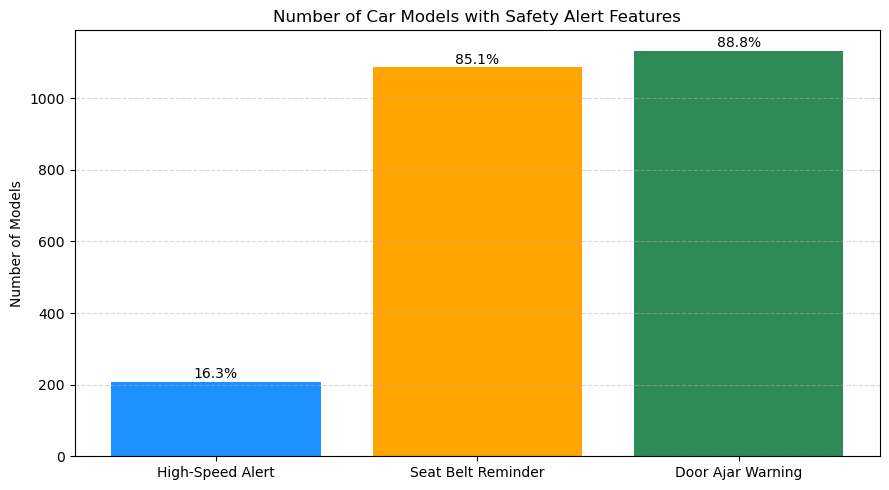

In [9]:
# Task_3

import matplotlib.pyplot as plt

# Task 1: Fill missing values with 'No'
df['High_Speed_Alert_System'].fillna('No', inplace=True)
df['Fasten_Seat_Belt_Warning'].fillna('No', inplace=True)
df['Door_Ajar_Warning'].fillna('No', inplace=True)

# Task 2: Count how many cars have each feature
high_speed_alerts_count = df['High_Speed_Alert_System'].value_counts().get('Yes', 0)
seat_belt_reminders_count = df['Fasten_Seat_Belt_Warning'].value_counts().get('Yes', 0)
door_ajar_warnings_count = df['Door_Ajar_Warning'].value_counts().get('Yes', 0)

# Task 3: Calculate percentage of models with each feature
total_models = len(df)
high_speed_alerts_percentage = (high_speed_alerts_count / total_models) * 100
seat_belt_reminders_percentage = (seat_belt_reminders_count / total_models) * 100
door_ajar_warnings_percentage = (door_ajar_warnings_count / total_models) * 100

# Output the results
print(f"Number of models with High-Speed Alerts: {high_speed_alerts_count} ({high_speed_alerts_percentage:.2f}%)")
print(f"Number of models with Seat Belt Reminders: {seat_belt_reminders_count} ({seat_belt_reminders_percentage:.2f}%)")
print(f"Number of models with Door-Ajar Warnings: {door_ajar_warnings_count} ({door_ajar_warnings_percentage:.2f}%)")

# Optional: Display dataframe for reference
print("\nCar Models and Their Alert System Features:")
print(df[['Make', 'Model', 'High_Speed_Alert_System', 'Fasten_Seat_Belt_Warning', 'Door_Ajar_Warning']])

# 📊 Plot: Number of models with each alert system
features = ['High-Speed Alert', 'Seat Belt Reminder', 'Door Ajar Warning']
counts = [high_speed_alerts_count, seat_belt_reminders_count, door_ajar_warnings_count]
percentages = [high_speed_alerts_percentage, seat_belt_reminders_percentage, door_ajar_warnings_percentage]

plt.figure(figsize=(9, 5))
bars = plt.bar(features, counts, color=['dodgerblue', 'orange', 'seagreen'])

# Annotate with percentage
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{percentages[i]:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Number of Car Models with Safety Alert Features")
plt.ylabel("Number of Models")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Overall Average Height: 1592.54 mm
Overall Average Length: 4296.88 mm
Overall Average Width: 1788.55 mm

Make-wise Average Dimensions:
                Make  Avg Height (mm)  Avg Length (mm)  Avg Width (mm)
0       Aston Martin      1294.333333      4623.000000     1982.333333
1               Audi      1543.166667      4715.096774     1879.366667
2              Bajaj      1652.000000      2752.000000     1312.000000
3            Bentley      1563.666667      5210.166667     2140.666667
4                Bmw      1541.486486      4816.891892     1980.243243
5            Bugatti      1212.000000      4544.000000     2038.000000
6             Datsun      1520.600000      3644.400000     1605.600000
7                 Dc      1200.000000      4565.000000     2120.000000
8            Ferrari      1275.250000      4668.125000     1956.000000
9               Fiat      1517.739130      4195.086957     1708.565217
10             Force      2061.666667      4108.666667     1800.000000
11           

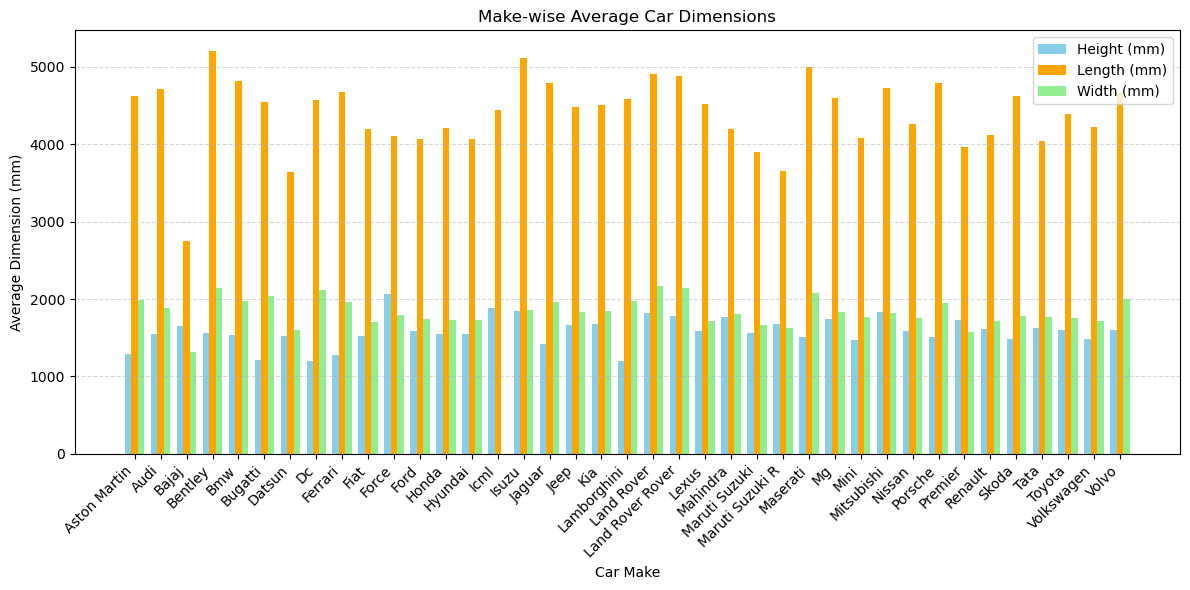

In [10]:
# Task_4

import matplotlib.pyplot as plt
import numpy as np

# Task 1: Calculate overall averages
average_height = df['Height_mm'].mean()
average_length = df['Length_mm'].mean()
average_width = df['Width_mm'].mean()

print(f"Overall Average Height: {average_height:.2f} mm")
print(f"Overall Average Length: {average_length:.2f} mm")
print(f"Overall Average Width: {average_width:.2f} mm")

# Task 2: Make-wise average dimensions
make_wise_avg = df.groupby('Make').mean(numeric_only=True).reset_index()

# Rename for clarity
make_wise_avg.rename(columns={
    'Height_mm': 'Avg Height (mm)',
    'Length_mm': 'Avg Length (mm)',
    'Width_mm': 'Avg Width (mm)'
}, inplace=True)

print("\nMake-wise Average Dimensions:")
print(make_wise_avg[['Make', 'Avg Height (mm)', 'Avg Length (mm)', 'Avg Width (mm)']])

# Plotting
makes = make_wise_avg['Make']
height = make_wise_avg['Avg Height (mm)']
length = make_wise_avg['Avg Length (mm)']
width = make_wise_avg['Avg Width (mm)']

x = np.arange(len(makes))  # label locations
bar_width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, height, width=bar_width, label='Height (mm)', color='skyblue')
plt.bar(x, length, width=bar_width, label='Length (mm)', color='orange')
plt.bar(x + bar_width, width, width=bar_width, label='Width (mm)', color='lightgreen')

plt.xlabel('Car Make')
plt.ylabel('Average Dimension (mm)')
plt.title('Make-wise Average Car Dimensions')
plt.xticks(ticks=x, labels=makes, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
